# Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

**Class Duration:** 2.5 hours

### Core Concepts We'll Cover:
1.  **Data Cleaning & Transformation:** Handling missing values and converting data types (especially dates).
2.  **Time-Series Analysis:** Analyzing how content has been added to Netflix over the years.
3.  **Text Data Manipulation:** Parsing and analyzing columns with multiple values, like `listed_in` (genres) and `cast`.
4.  **Geographical & Rating Analysis:** Understanding where content comes from and its maturity level.
5.  **Feature Engineering:** Creating new, insightful features like 'content age'.
6.  **Advanced Visualization:** Creating insightful plots to understand distributions and relationships in the data.

### Step 1: Setup - Importing Libraries

As always, we begin by importing our essential data science toolset, including a new library for word clouds.

In [1]:
# Import pandas for data manipulation and analysis.
import pandas as pd
# Import numpy for numerical operations, often used with pandas.
import numpy as np
# Import matplotlib.pyplot for creating static, interactive, and animated visualizations.
import matplotlib.pyplot as plt
# Import seaborn for making attractive and informative statistical graphics.
import seaborn as sns
# Import WordCloud for generating word cloud visualizations.
from wordcloud import WordCloud

# Set the style of the plots to 'darkgrid' for better readability against a dark background.
sns.set_style('darkgrid')

### Step 2: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset and perform a high-level overview.

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object` (a string), not a `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.

### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

#### **Theoretical Concept: Data Type Conversion & Handling Nulls**
Data often comes in non-ideal formats. Storing dates as strings, for example, prevents us from extracting components like the year or month, or from plotting data over time. Converting columns to their proper data types (`pd.to_datetime`, `.astype()`) is a fundamental preprocessing step.

For null values, we have several strategies:
1.  **Drop:** If only a very small percentage of rows have missing data, dropping them might be acceptable (`.dropna()`).
2.  **Fill/Impute:** Replace missing values with a placeholder (like "Unknown") or a statistical measure (like the mode for categorical data). This is useful when you don't want to lose the other information in those rows.

* **format='mixed':** This argument tells pandas to infer the date format automatically. This is helpful when the date strings in the column have different formats.

* **dayfirst=False:** This argument specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd) rather than day first (February 1st).

In [5]:
# cheking the missing values
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [7]:
# cheking the missing values
print(netflix_df.isnull().sum())

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64


You can see above that the missing vlaues of columns such as  'director' and 'cast' have been handled successfully

In [8]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [9]:
# cheking the missing values
print(netflix_df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64


In [10]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [11]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

* **format='mixed':** This argument tells pandas to infer the date format automatically. This is helpful when the date strings in the column have different formats.

* **dayfirst=False:** This argument specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd) rather than day first (February 1st).

In [12]:
netflix_df['year_added']= netflix_df['date_added'].dt.year
netflix_df['month_added']= netflix_df['date_added'].dt.month

In [13]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


All the missing values has been handled in this stage.


### Step 4: Exploratory Data Analysis & Visualization

#### 4.1 What is the distribution of content type?

In [14]:
# check the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [15]:
# in which content type is determined from the attribute "type"
netflix_df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


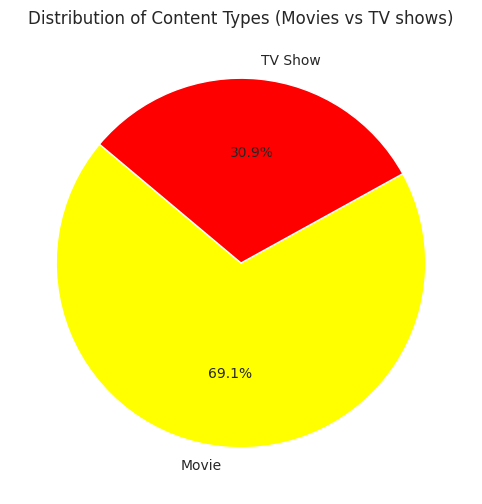

In [16]:
# draw pie chart
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['yellow','red'])
plt.title('Distribution of Content Types (Movies vs TV shows)')
plt.ylabel('')
plt.show()

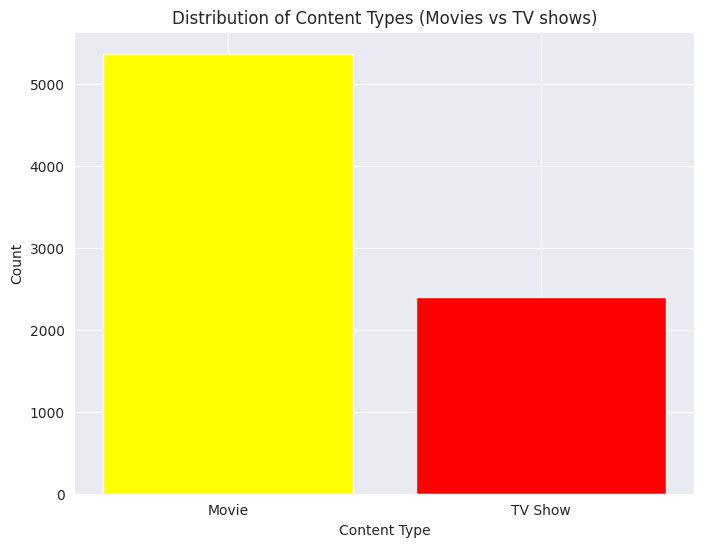

In [17]:
# we can plot any other chart too for it
# For example: Bar chart
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color=['yellow','red'])
plt.title('Distribution of Content Types (Movies vs TV shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

#### 4.2 How has content been added over time?

In [18]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [19]:
# from the attributes given, date_added can be used for finding it..
content_over_time = netflix_df.groupby(['year_added','type']).size().unstack().fillna(0)
content_over_time

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1400x800 with 0 Axes>

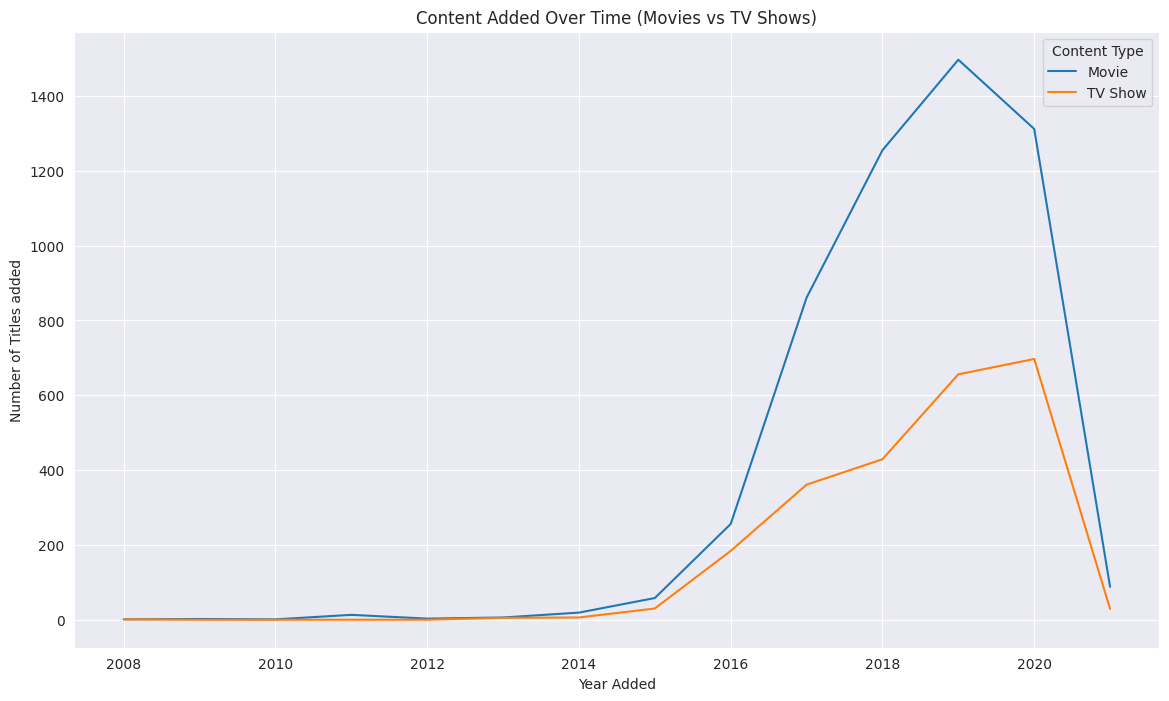

In [20]:
plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', figsize=(14,8))
plt.title('Content Added Over Time (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

#### 4.3 What are the most popular genres?

##### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

###### METHOD 1

In [21]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [22]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [23]:
# listed_in attribute is the one which we have to use for finding the genres of the movie which it listed in.
# since its a string, we have to split the string which is seperated by comma
popular_genres = netflix_df['listed_in'].str.split(', ', expand=True).stack().value_counts()
popular_genres

,count
International Movies,2437
Dramas,2105
Comedies,1471
International TV Shows,1197
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,673
Children & Family Movies,532
Romantic Movies,531


In [24]:
popular_genres = netflix_df['listed_in'].str.split(', ', expand=True).stack().value_counts()
popular_genres

,count
International Movies,2437
Dramas,2105
Comedies,1471
International TV Shows,1197
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,673
Children & Family Movies,532
Romantic Movies,531


In [25]:
#most popular one among those is
popular_genres.head(1)


,count
International Movies,2437


In [26]:
#print only the string
popular_genres.head(1).index[0]

'International Movies'

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

METHOD 2

In [27]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

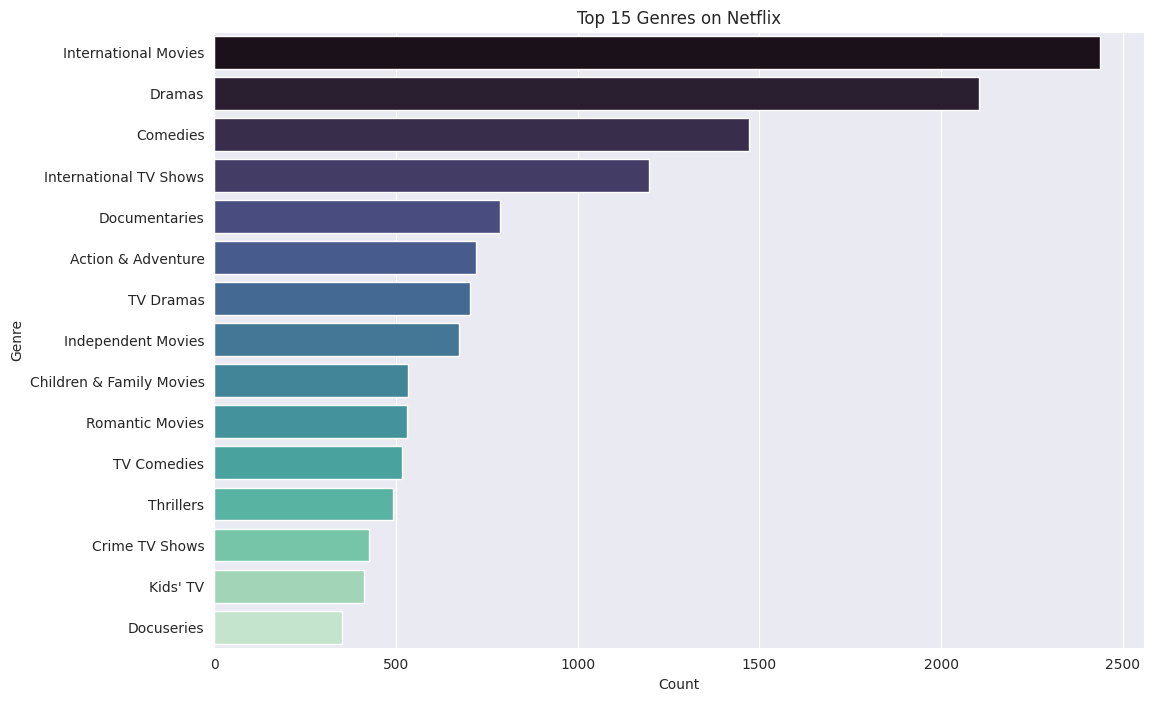

In [28]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [29]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [30]:
#content duration get from duration attribute
# since duration has got different types for each type, we have to seperate both types

#seperate TV shows and Movies
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [31]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

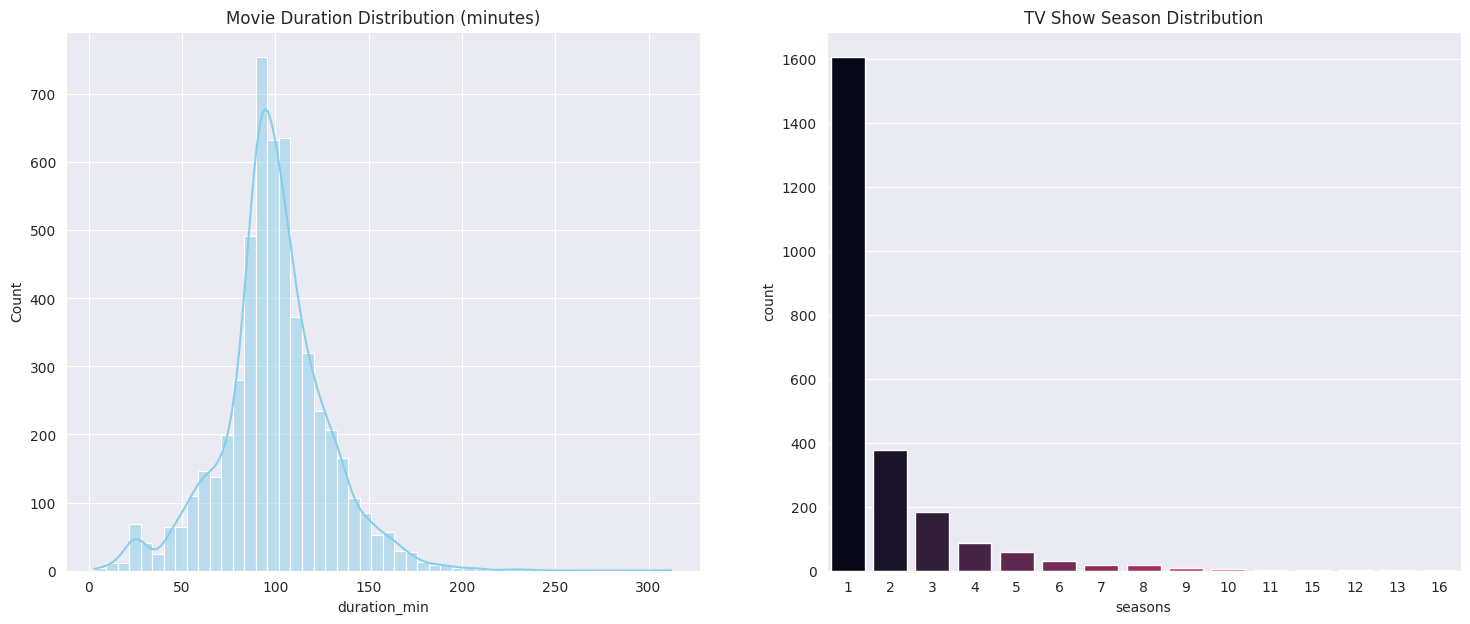

In [32]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [33]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [34]:
# content come from country attribute

# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [35]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

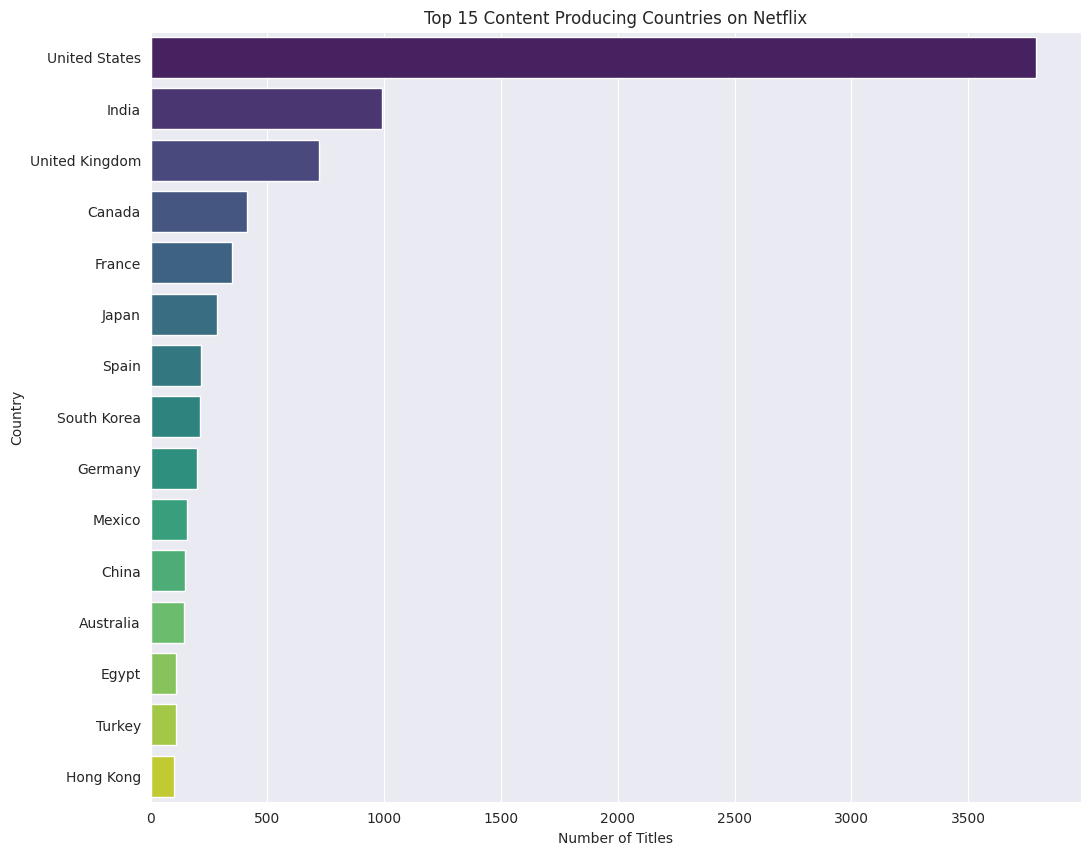

In [36]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [37]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.6 What are the maturity ratings of the content?

In [38]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

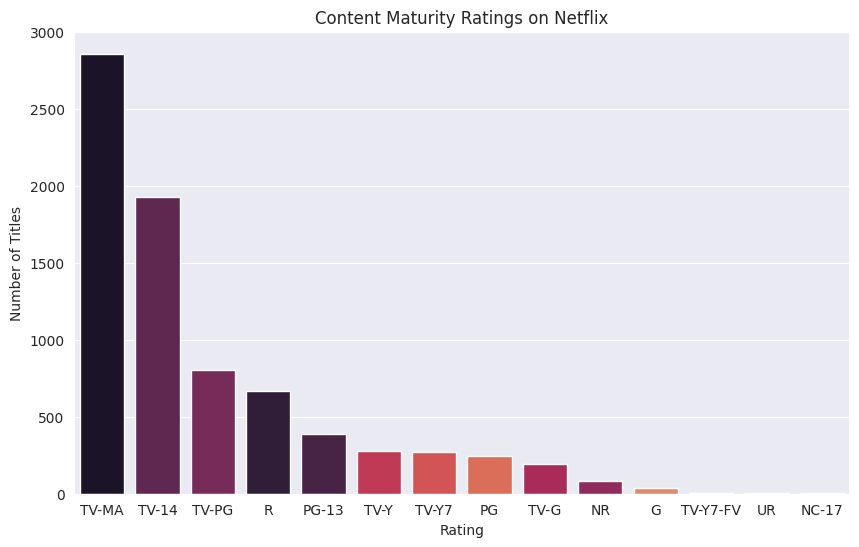

In [39]:
# this can be solved using the attribute "rating"

plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_df, x='rating', palette='rocket', order=netflix_df['rating'].value_counts().index, hue='rating', legend=False)
plt.title('Content Maturity Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

In [40]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [41]:
# to do it, we can make use of "year_added" and "release year" attributes

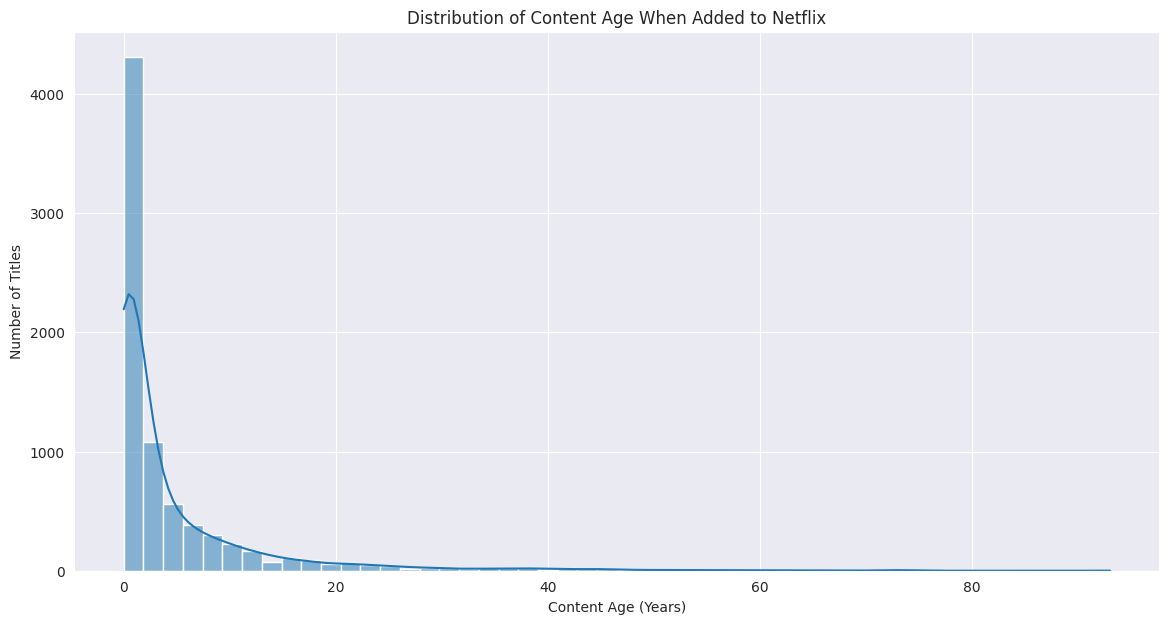

In [42]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

In [43]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

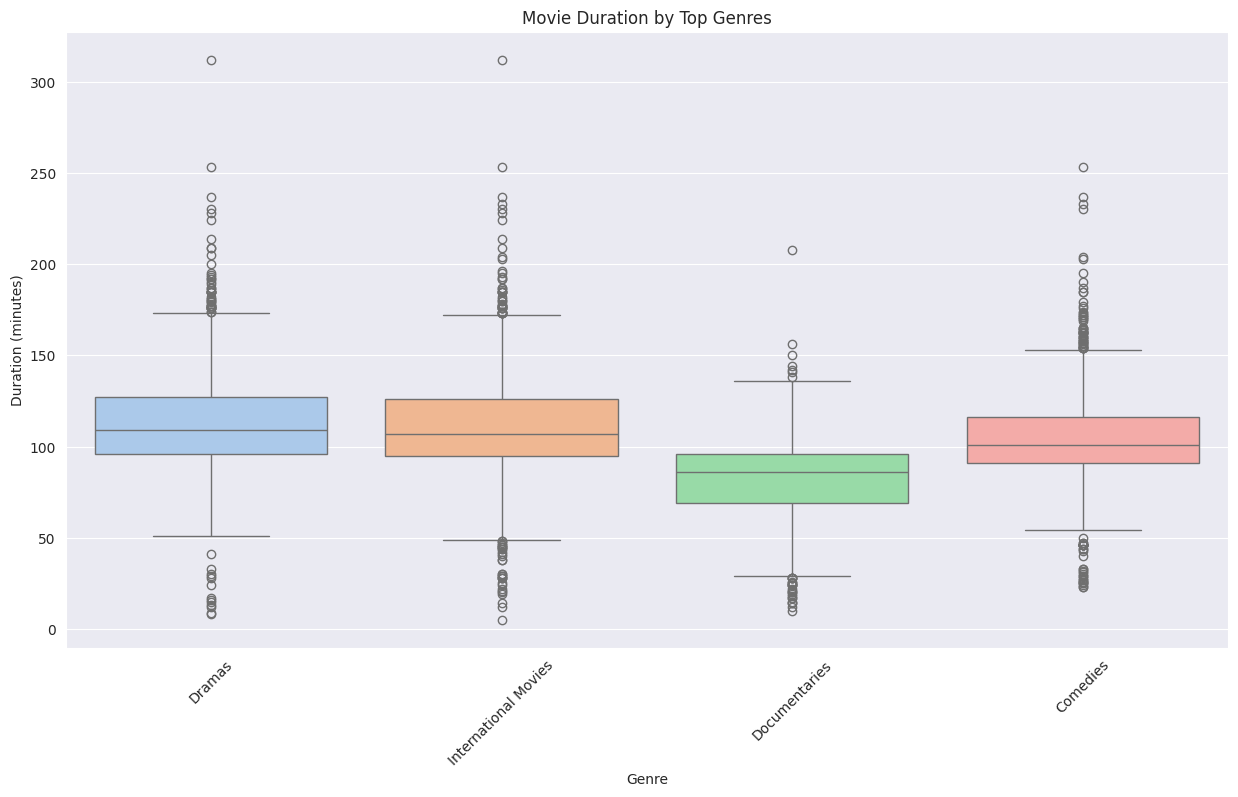

In [44]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [45]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

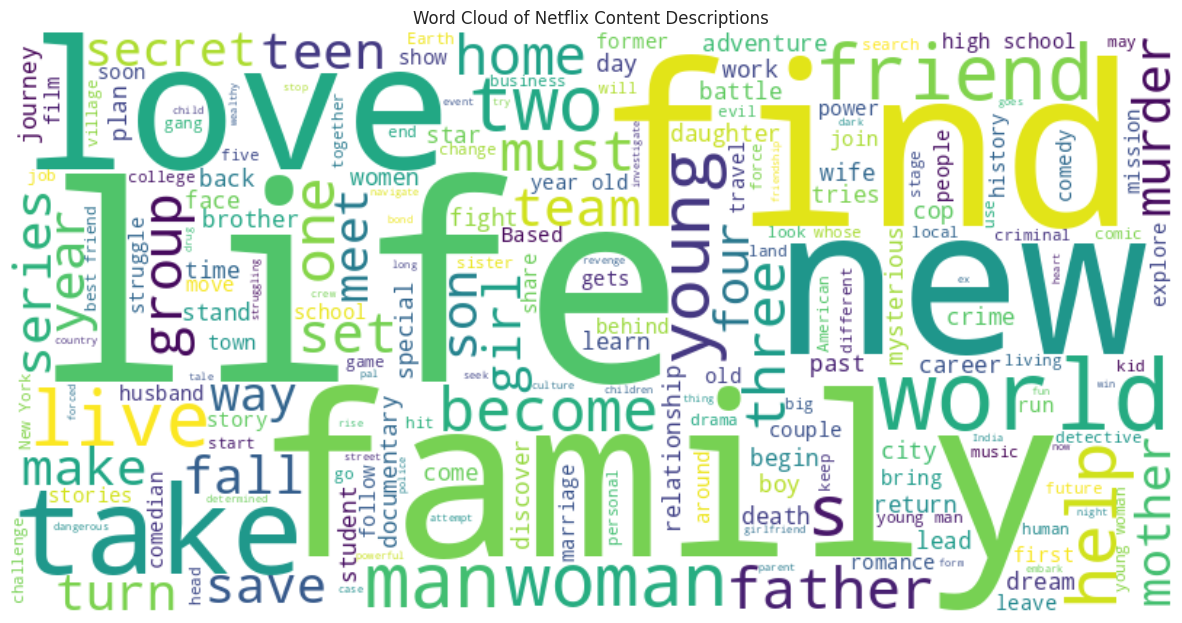

In [46]:
# to get it we need to use "description" attribute since this attribute describes the movie

#combine all descriptions into a single string
text =''.join(netflix_df['description'].dropna())

#create and generate a word cloud image
# we use wordCloud library for it

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Netflix Content Descriptions')
plt.axis('off')
plt.show()


**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1.  **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2.  **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3.  **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4.  **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5.  **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

### You can connect with me on [Linkedin](https://www.linkedin.com/in/harshvardhan-singh-350262178/) if you like the content

## Submission Question 1: How has the distribution of content ratings changed over time?

In [51]:
netflix_df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

In [52]:
# Logic for solving this question by grouping year_added and its rating.

#group the two attributes
rating_over_time = netflix_df.groupby(['year_added','rating']).size()
rating_over_time


year_added  rating
2008        TV-MA      2
2009        TV-MA      2
2010        NR         1
2011        TV-14      5
            TV-MA      3
                      ..
2021        TV-G       6
            TV-MA     26
            TV-PG      2
            TV-Y       5
            TV-Y7      3
Length: 106, dtype: int64

In [53]:
# count how many titles fall into each category for each year,
rating_over_time.unstack().fillna(0)


rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2014,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,12.0,4.0,2.0,0.0,0.0,0.0
2015,1.0,0.0,5.0,2.0,2.0,3.0,15.0,8.0,29.0,8.0,8.0,5.0,2.0,0.0
2016,2.0,1.0,28.0,3.0,6.0,14.0,103.0,9.0,163.0,53.0,11.0,46.0,1.0,0.0


/tmp/ipython-input-278949457.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Rating')


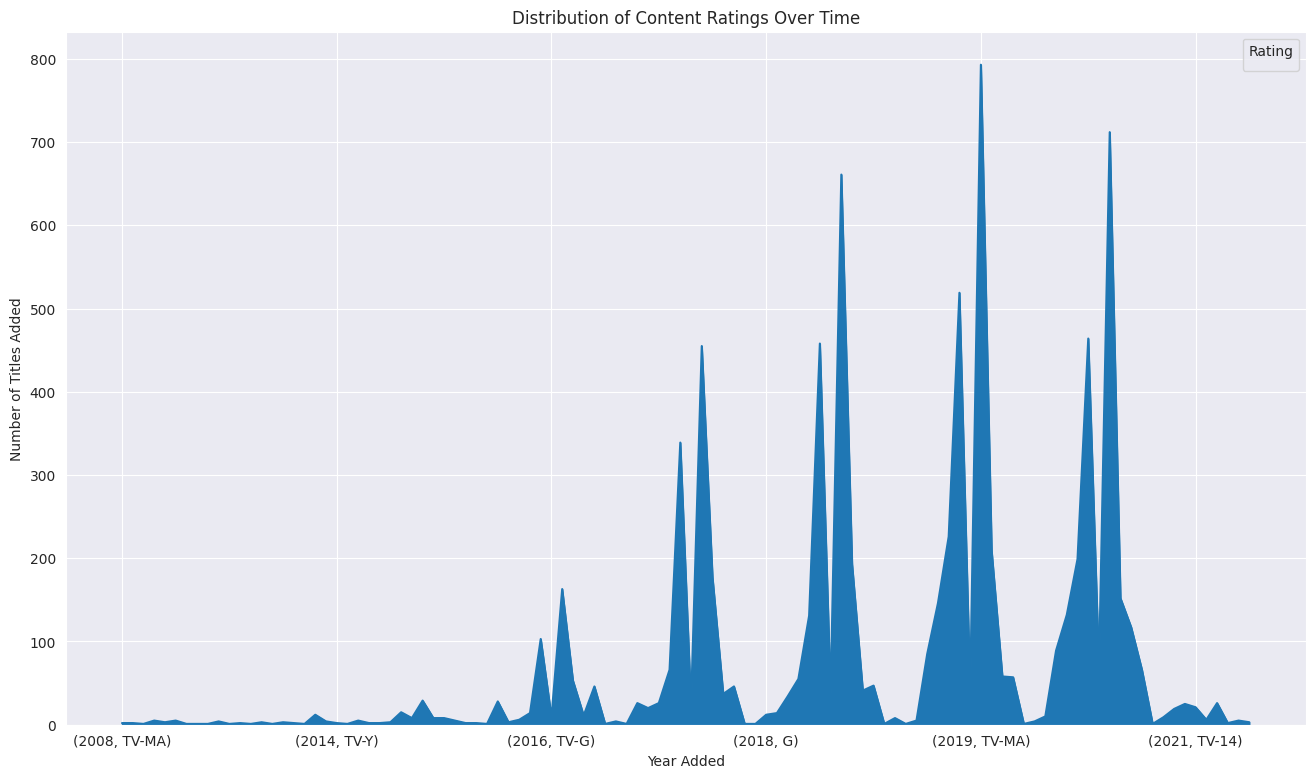

In [55]:
# visualize this as a stacked area plot to show the distribution of ratings over time.

# Plot the data
plt.figure(figsize=(16, 9))
rating_over_time.plot(kind='area', stacked=True, figsize=(16, 9))
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Rating')
plt.grid(True)
plt.show()

### Insight:
- The number of movies added to the platform has been incresed after 2015 and then it has got a gradual fall after 2020.
- TV-MA and TV-14 dominated during after 2014 especially after 2016
- Rating such as TV-Y, TV-Y7, TV-G, PG, and G are present in the same way like TV-MA and TV-14 but smaller compared to those.
- UR, and NR rated movies are barely added in the platform throughout the time period given

## Submission Question 2: Is there a relationship between content age and its type (Movie vs. TV Show)?

In [56]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

In [57]:
movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].copy()

# Extract the 'age_on_netflix' series for movies and TV shows
movies_age = movies['age_on_netflix']
tv_shows_age = tv_shows['age_on_netflix']


In [58]:
# Import the ttest_ind function from the scipy.stats library.
# This function is used to perform an independent samples t-test,
# which helps us determine if there is a statistically significant difference
# between the means of two independent groups (in this case, the mean age
# of Movies and TV Shows when added to Netflix).
from scipy.stats import ttest_ind

In [59]:
# Perform the independent samples t-test
# We use equal_var=False as the variances seem unequal based on the boxplot
t_stat, p_val = ttest_ind(movies_age, tv_shows_age, equal_var=False)

print(f"T-test statistic: {t_stat:.2f}, P-value: {p_val:.5f}")

# Interpret the results
if p_val < 0.05:
    print("Conclusion: There is a statistically significant difference in the mean content age between Movies and TV Shows.")
else:
    print("Conclusion: There is no statistically significant difference in the mean content age between Movies and TV Shows.")

T-test statistic: 19.02, P-value: 0.00000
Conclusion: There is a statistically significant difference in the mean content age between Movies and TV Shows.


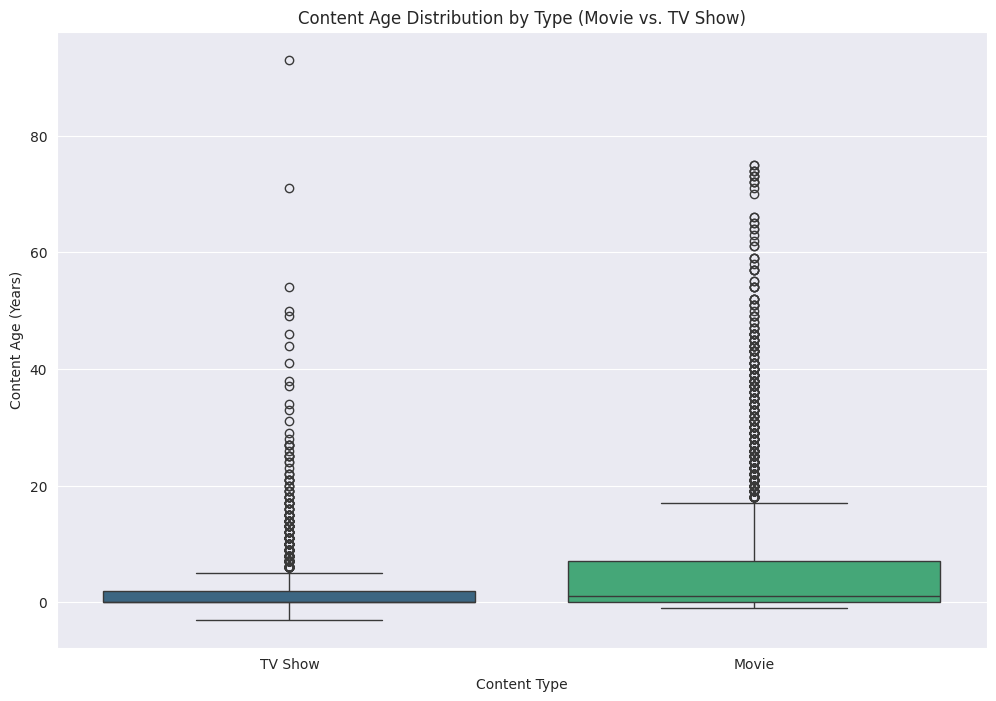

In [60]:
# Visualize the distribution of content age by type using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=netflix_df, x='type', y='age_on_netflix', palette='viridis', hue='type', legend=False)
plt.title('Content Age Distribution by Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()

### Insight:

- By t-test library we found that there is a statistically significant difference in the mean content age between Movies and TV Shows
- by seeing the above plot, it is evident that
  - the median of age of Movies are larger compared to TV shows, so more Movies are there compared in the platform for a long time compared to TV shows

## Submission Question 3: Can we identify any trends in content production based on the release year vs. the year added to Netflix?

In [61]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

In [62]:
# we need to use release_year and year_added columns for this

# first group by year to see how many titles were produced to platform each year to see content release trend
release_trend = netflix_df.groupby('release_year').size()

# second group by year_added to see how many titles were added to platform each year to see content added trend

# Content acquisition trend by year added
added_trend = netflix_df.groupby('year_added').size()



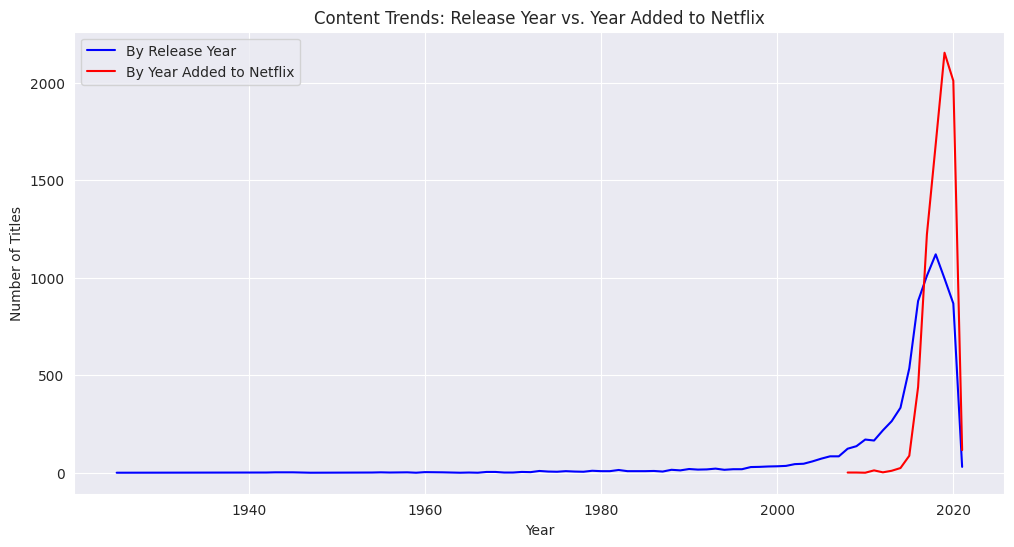

In [63]:
# compare these two trends by plotting a graph

# --- Plot both trends ---
plt.figure(figsize=(12,6))
release_trend.plot(label="By Release Year", color="blue")
added_trend.plot(label="By Year Added to Netflix", color="red")
plt.legend()
plt.title("Content Trends: Release Year vs. Year Added to Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()



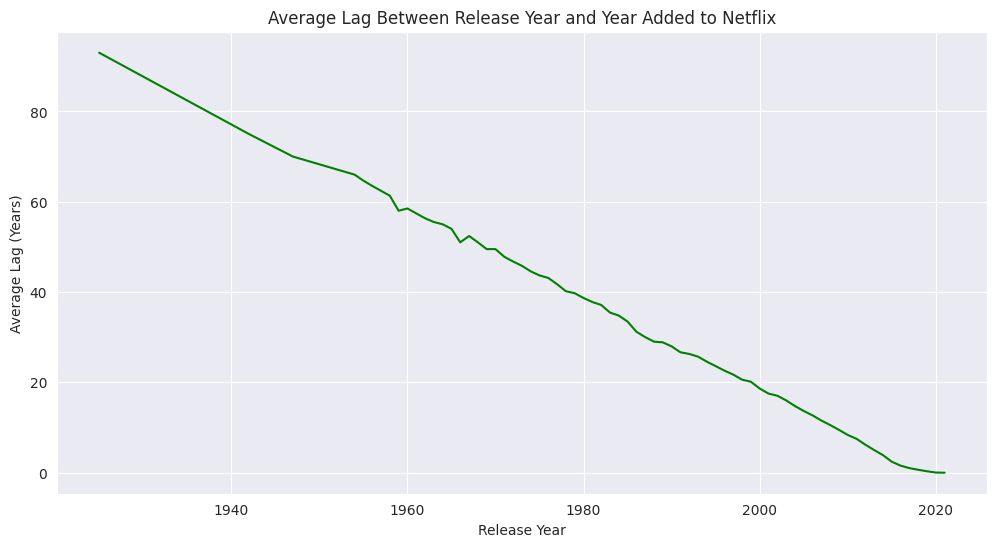

In [64]:
# 3. Lag analysis (age_on_netflix already exists)
lag_trend = netflix_df.groupby('release_year')['age_on_netflix'].mean()

plt.figure(figsize=(12,6))
lag_trend.plot(color="green")
plt.title("Average Lag Between Release Year and Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Average Lag (Years)")
plt.show()


### Insights:
- From the first diagram, it is clearly seen that there is a sharp growth of netflix content. The red line (year added) shows a huge spike, meaning Netflix rapidly expanded its library during 2015–2019.
- In the first diagram, the blue line (release year) shows that the majority of titles on Netflix were produced after 2000, with a peak around 2018. Which means that most contents are recent
- From the second diagram about lag between release and addition to the platform, older titles (like from the 1930s–1980s) were added much later, but after 2000 the gap between release and being added got much smaller.
- Overall, it is evident that 2015-2020, most of the movies which is released sooner added into the platform

## Submission Question 4: What are the most common word pairs or phrases in content descriptions?

In [65]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

,description
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,"when an army recruit is found dead, his fellow..."
3,"in a postapocalyptic world, rag-doll robots hi..."
4,a brilliant group of students become card-coun...
...,...
7782,when lebanon's civil war deprives zozo of his ...
7783,a scrappy but poor boy worms his way into a ty...
7784,"in this documentary, south african rapper nast..."
7785,dessert wizard adriano zumbo looks for the nex...


In [75]:
# Import CountVectorizer from scikit-learn's feature_extraction.text module.
# CountVectorizer is used to convert a collection of text documents to a matrix
# of token counts. In this case, it will help us count the occurrences of
# word pairs (bigrams) in the content descriptions.
from sklearn.feature_extraction.text import CountVectorizer

In [72]:

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(descriptions)

In [73]:
# Sum up the counts for each bigram across all descriptions.
# .sum(axis=0) sums the counts column-wise (for each bigram).
# .A1 converts the resulting matrix to a 1D numpy array.
bigram_counts = X.sum(axis=0).A1

# Create a dictionary where keys are the bigram phrases and values are their total counts.
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))

In [76]:
# Sort and take top 20
common_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]

# Show results
for phrase, count in common_bigrams:
    print(f"{phrase}: {count}")

high school: 133
year old: 130
young man: 103
young woman: 98
new york: 86
small town: 59
best friend: 51
true story: 48
stand special: 47
world war: 46
best friends: 45
based true: 43
documentary follows: 38
los angeles: 38
war ii: 38
falls love: 37
documentary series: 35
york city: 35
road trip: 33
serial killer: 32


## Submission Question 5: Who are the top directors on Netflix?

In [77]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

In [81]:
# we use director column for this

directors = netflix_df['director']


In [83]:
netflix_df.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,1
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11,22
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,4,0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,12,9


In [85]:
# we can see that above, director attribute is a string which contain multiple director names which are seperated by comma

# Split in case multiple directors are listed per title (comma-separated)
directors = directors.str.split(',').explode().str.strip()

In [86]:
# count occurrences
top_directors = directors.value_counts()

In [87]:
# top 20 directors
print(top_directors.head(20))

director
Unknown                2376
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Jay Chapman              12
Steven Spielberg         10
Anurag Kashyap            9
David Dhawan              9
Shannon Hartman           9
Johnnie To                8
Hakan Algül               8
Lance Bangs               8
Justin G. Dyck            8
Kunle Afolayan            8
Quentin Tarantino         8
Umesh Mehra               8
Name: count, dtype: int64
